# Tarea 2

## Instrucciones:
1. Modifique el nombre del documento para agregar tu nombre y apellido
2. Una vez elaborados los ejercicios enviar vía correo electrónico `mario.villasante@ciencias.unam.mx`
3. La fecha **límite** de entrega será el día **viernes 31 de mayo**.

Tómese la libertad de agregar celdas de código y texto como usted crea conveniente. Explique y comente el código. Para mayor información sobre la entrega de tareas favor de consultar [este](https://github.com/mvillasante/Programacion_I/blob/master/Formato_Tareas.md) link.

# Métodos Monte Carlo

## 1. Integrales con puntos

Considera la función complicada (patológica) $$f(x) = \sin^2 (\textstyle \frac{1}{x}).$$

1. Dibuja la función para $x$ entre $-2$ y $2$.


In [1]:
using Plots
gr()

Plots.GRBackend()

Debemos tener cuidado al evaluar nuestra función. Veamos el arreglo siguiente

In [2]:
δx =0.1
xes = [i for i in -2:δx:2]

41-element Array{Float64,1}:
 -2.0
 -1.9
 -1.8
 -1.7
 -1.6
 -1.5
 -1.4
 -1.3
 -1.2
 -1.1
 -1.0
 -0.9
 -0.8
  ⋮  
  0.9
  1.0
  1.1
  1.2
  1.3
  1.4
  1.5
  1.6
  1.7
  1.8
  1.9
  2.0

Si intentamos evaluar el siguiente elemento en nuestra función tendremos problemas

In [5]:
xes[21]

0.0

In [6]:
1/0.0

Inf

Si bien ahorita no nos será útil la variable `Inf` en otros contextos puede llegar a ser muy útil:

In [7]:
1/Inf

0.0

In [9]:
-1/Inf

-0.0

In [10]:
500 + Inf

Inf

In [11]:
-500+Inf

Inf

In [12]:
500-Inf

-Inf

In [13]:
Inf + Inf

Inf

In [14]:
Inf-Inf

NaN

In [16]:
Inf*Inf

Inf

In [17]:
Inf/Inf

NaN

Regresando a nuestro problema original.

In [23]:
δx =1e-3
xes = [i for i in -2:pi*δx:2]

1274-element Array{Float64,1}:
 -2.0               
 -1.9968584073464102
 -1.9937168146928204
 -1.9905752220392305
 -1.9874336293856407
 -1.9842920367320511
 -1.9811504440784613
 -1.9780088514248715
 -1.9748672587712817
 -1.9717256661176918
 -1.968584073464102 
 -1.9654424808105122
 -1.9623008881569224
  ⋮                 
  1.9646899288303192
  1.9678315214839088
  1.9709731141374989
  1.9741147067910885
  1.9772562994446785
  1.980397892098268 
  1.9835394847518577
  1.9866810774054477
  1.9898226700590373
  1.9929642627126274
  1.996105855366217 
  1.999247448019807 

In [24]:
f(x) = (sin(1/x))^2

yes = [f(i) for i in xes]

1274-element Array{Float64,1}:
 0.22984884706593015
 0.23051111065042523
 0.23117613153994562
 0.2318439243033492 
 0.23251450359894743
 0.23318788417508624
 0.23386408087072988
 0.2345431086160476 
 0.2352249824330038 
 0.23590971743595227
 0.2365973288322319 
 0.23728783192276756
 0.2379812421026727 
 ⋮                  
 0.23745366931717127
 0.23676247125445038
 0.23607416856520216
 0.2353887459259946 
 0.23470618810712546
 0.23402647997202147
 0.23334960647664085
 0.23267555266887902
 0.23200430368797803
 0.2313358447639379 
 0.2306701612169329 
 0.23000723845672974

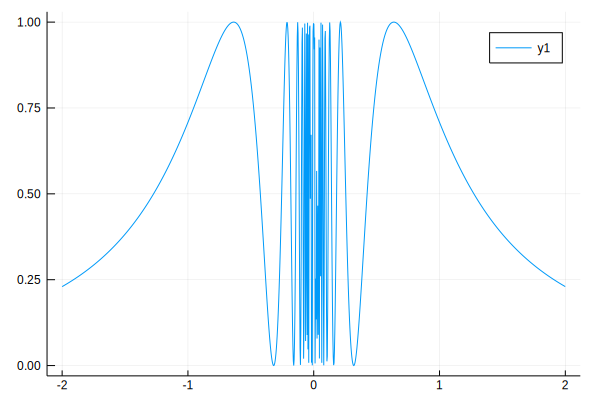

In [25]:
plot(xes,yes)

In [33]:
mitad = Int64(floor((length(xes)+1)/2))

637

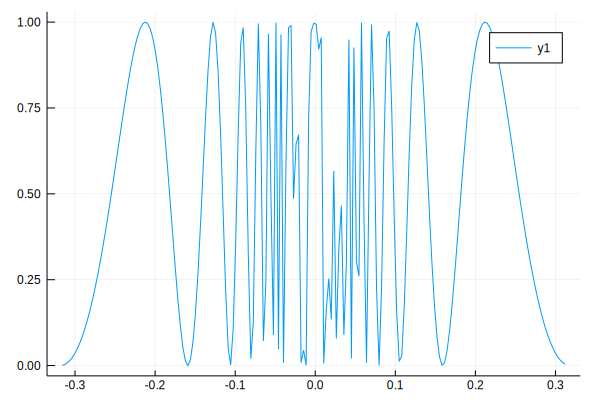

In [34]:

plot(xes[mitad-100:mitad+100],yes[mitad-100:mitad+100])

Sea 
$$ I(x) := \int_0^x f(x') dx'.$$ 

Sabemos que $0 < I(x) < x$ para toda $x$ (¿por qué?), pero no está fácil calcular su valor, ni siquiera con los métodos numéricos estándares, debido a la naturaleza complicada de la función cerca de $x = 0$.

2. Utiliza un método parecido al que usamos antes para calcular $\pi$ usando puntos aleatorios $I(x)$ para un valor de $x$ dado.




In [53]:
### Generamos puntos aleatorios

### Comparamos la coordeana vertical del punto (xes,yes_aleatorio) con 
### el valor f(xes) > yes_aleatorio
δx =1e-6
xes = [i for i in δx:pi*δx:2]
yes_aleatorio = [rand() for i in 1:length(xes)]

636620-element Array{Float64,1}:
 0.919472758543449  
 0.3675062915563294 
 0.18849698125357972
 0.18418936036317546
 0.732210258112107  
 0.04549694854941588
 0.8570899607452231 
 0.655471959167184  
 0.4512421499580461 
 0.5542675848680778 
 0.49369499050949495
 0.8406104426831096 
 0.41684442331254945
 ⋮                  
 0.41733143522668326
 0.2857479580175344 
 0.34960487853503563
 0.15385678508185907
 0.29931074189109785
 0.06809790105216096
 0.12872790625974884
 0.3347536733849741 
 0.09082556794814245
 0.7028645127999702 
 0.511195527385484  
 0.9873205813421431 

In [54]:
contador = 0
for i in 1:length(xes)
    if f(xes[i]) > yes_aleatorio[i]
        contador += 1
    end
end

In [55]:
contador

344798

In [56]:
total_puntos = length(xes)
contador /total_puntos

0.5416072382268857

In [57]:
1.08441/ans

2.002207362571709

Nótese que $max(f(x)) = 1$ para $x\in \mathbb{R}$. Por lo tanto nuestra integral se puede acotar por arriba y por abajo:

$$ I(x) = \int_0^x f(x')dx' \le (x-0)*max(f(x)) $$

Al arrojar puntos aleatorios podemos calcular la integral si nos damos cuenta que:

$$\frac{puntos_{abajo}}{puntos_{totales}} = \frac{A_{sin}}{A_{rec}}$$

donde

$$A_{rect} = 1*x.$$ 

Por lo tanto

$$A_{sin}= \frac{puntos_{abajo}}{puntos_{totales}} x $$


3. Dibuja la función $I(x)$.

## 2. Paradoja del cumpleaños

Si tenemos un grupo de `N` personas. ¿Cuál es la probabilidad de que dos personas cumplan años el mismo día?  
Para responder a esta pregunta en general, dividamos este problema en partes

1. Sin usar la computadora. ¿Para que valor de `N` la probabilidad es 100%?

2. Escriba un código donde se demuestre que para $N=30$ la probabilidad es 70%

3. Dibuje una gráfica en la que se grafique la probabilidad como función de el número de personas (`N`). Esta gráfica contesta la pregunta principal

# Cadenas y arreglos

## 3. Modificando arreglos
Escribe una función que acepte como argumento un arreglo y regrese otro arreglo con los elementos del primero pero ordenados al revés.

## 4. Palíndromo
Escribe una función que acepte una cadena y nos diga si es un palíndromo o no.

## 5. Ordenando
Escribe una función que tome un arreglo con números como argumento y regrese `true` si el arreglo está ordenado de menor a mayor y `false` si no lo está.

## 6. Contando letras
1. Escribe una función que lea una cadena y regrese el valor `true` si la palabra no contiene la letra `e`.

2. Modifique la función anterior de tal manera que acepte como argumento una cadena y una letra cualquiera y cuente el número de apariciones de la letra dentro de la cadena.

